<a href="https://colab.research.google.com/github/johanesPao/tensorflow_developer_certificate/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. SUch as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-06-09 07:16:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   315MB/s    in 0.3s    

2022-06-09 07:16:12 (315 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}') # show the shape of the image

    return img

['105910.jpg']
Image shape: (384, 512, 3)


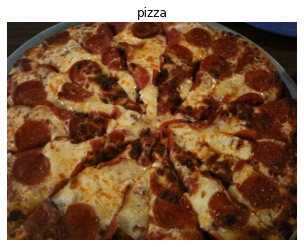

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [10]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 31,  32,  24],
        [ 29,  30,  22],
        [ 28,  29,  23],
        ...,
        [ 37,  40,  75],
        [ 33,  36,  71],
        [ 25,  28,  63]],

       [[ 33,  34,  26],
        [ 32,  33,  25],
        [ 32,  33,  27],
        ...,
        [ 38,  40,  78],
        [ 37,  40,  75],
        [ 31,  34,  69]],

       [[ 36,  36,  28],
        [ 37,  37,  29],
        [ 38,  37,  32],
        ...,
        [ 40,  42,  80],
        [ 41,  43,  81],
        [ 38,  40,  78]],

       ...,

       [[121,  71,  38],
        [135,  82,  48],
        [133,  81,  42],
        ...,
        [ 26,  21,  17],
        [ 16,  11,   8],
        [ 10,   5,   2]],

       [[112,  62,  25],
        [122,  70,  31],
        [128,  77,  34],
        ...,
        [ 21,  16,  13],
        [ 16,  11,   8],
        [ 12,   7,   4]],

       [[117,  67,  30],
        [120,  68,  28],
        [126,  73,  29],
        ...,
        [ 17,  12,   

In [11]:
# View the image shape
img.shape # returns height, width, color channels

(384, 512, 3)

🔑 **Note:** As we've discussed before, many machine laerning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.12156863, 0.1254902 , 0.09411765],
        [0.11372549, 0.11764706, 0.08627451],
        [0.10980392, 0.11372549, 0.09019608],
        ...,
        [0.14509804, 0.15686275, 0.29411765],
        [0.12941176, 0.14117647, 0.27843137],
        [0.09803922, 0.10980392, 0.24705882]],

       [[0.12941176, 0.13333333, 0.10196078],
        [0.1254902 , 0.12941176, 0.09803922],
        [0.1254902 , 0.12941176, 0.10588235],
        ...,
        [0.14901961, 0.15686275, 0.30588235],
        [0.14509804, 0.15686275, 0.29411765],
        [0.12156863, 0.13333333, 0.27058824]],

       [[0.14117647, 0.14117647, 0.10980392],
        [0.14509804, 0.14509804, 0.11372549],
        [0.14901961, 0.14509804, 0.1254902 ],
        ...,
        [0.15686275, 0.16470588, 0.31372549],
        [0.16078431, 0.16862745, 0.31764706],
        [0.14901961, 0.15686275, 0.30588235]],

       ...,

       [[0.4745098 , 0.27843137, 0.14901961],
        [0.52941176, 0.32156863, 0.18823529],
        [0.52156863, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
#train_datagen = ImageDataGenerator(rescale=1./255)
#valid_datagen = ImageDataGenerator(rescale=1./255)
# DEPRECATED!

# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
valid_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
valid_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data_scaled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 100ms/step - loss: 0.6014 - accuracy: 0.6707 - val_loss: 0.4500 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 4s 85ms/step - loss: 0.4465 - accuracy: 0.7933 - val_loss: 0.4234 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 4s 87ms/step - loss: 0.3988 - accuracy: 0.8327 - val_loss: 0.3406 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 4s 86ms/step - loss: 0.3650 - accuracy: 0.8507 - val_loss: 0.3311 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 4s 86ms/step - loss: 0.3355 - accuracy: 0.8613 - val_loss: 0.3114 - val_accuracy: 0.8840


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

In [14]:
# Epoch 1/5
# 47/47 [==============================] - 83s 2s/step - loss: 0.6014 - accuracy: 0.6707 - val_loss: 0.4496 - val_accuracy: 0.7960

In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.57217&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [16]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 70ms/step - loss: 121.9062 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 68ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 68ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 67ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 69ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 70ms/step - loss: 609.9274 - accuracy: 0.6173 - val_loss: 177.8128 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 4s 71ms/step - loss: 292.9599 - accuracy: 0.6927 - val_loss: 108.0111 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 4s 69ms/step - loss: 108.7847 - accuracy: 0.7180 - val_loss: 53.1230 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 4s 69ms/step - loss: 70.5347 - accuracy: 0.7280 - val_loss: 38.4549 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 4s 69ms/step - loss: 67.0732 - accuracy: 0.7493 - val_loss: 206.3416 - val_accuracy: 0.6220


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Adjust different parameters and imporve the model (try to beat our baseline)
7. Repeat until satisified (experiment, experiment, experiment)

### 1. Become one with the data

['2928643.jpg']
Image shape: (289, 512, 3)
['937915.jpg']
Image shape: (512, 512, 3)


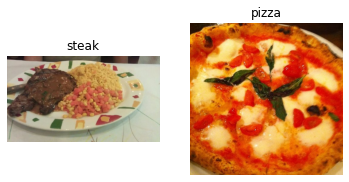

In [21]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=en

In [23]:
from tensorflow.keras.utils import image_dataset_from_directory

# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir, # Target directory of images
                                          label_mode='binary', # type of data you're working with
                                          batch_size=32, # size of minibatches to load data into
                                          image_size=(224, 224), # Target size of images (height, width)
                                          seed=42)
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
test_data = image_dataset_from_directory(directory=test_dir,
                                          label_mode='binary',
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
test_data_scaled = test_data.map(lambda x, y: (scaling_layer(x), y))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [24]:
len(train_data_scaled)

47

In [25]:
for images, labels in train_data_scaled.take(1):
    print(images[0].shape, labels[0].shape, images, labels)

(224, 224, 3) (1,) tf.Tensor(
[[[[4.20034289e-01 2.18266070e-01 6.46070987e-02]
   [4.25735325e-01 2.23967120e-01 7.03081265e-02]
   [4.04044151e-01 2.09401280e-01 6.52661100e-02]
   ...
   [2.17713509e-02 2.00629421e-02 9.30717867e-03]
   [7.33046979e-03 6.71524229e-03 0.00000000e+00]
   [4.58801072e-03 1.28925573e-02 0.00000000e+00]]

  [[4.14301991e-01 2.24298477e-01 6.74357265e-02]
   [4.17174399e-01 2.27170885e-01 7.03081265e-02]
   [3.98225576e-01 2.16450348e-01 6.60351664e-02]
   ...
   [1.25350151e-02 8.99230968e-03 4.68558632e-03]
   [2.27350183e-03 9.11781564e-04 0.00000000e+00]
   [3.40992888e-03 1.53122041e-02 4.30672336e-03]]

  [[4.03680235e-01 2.30826095e-01 6.80672303e-02]
   [4.08228308e-01 2.37424970e-01 7.36407191e-02]
   [4.00436461e-01 2.27554798e-01 7.46136084e-02]
   ...
   [1.60189085e-02 1.33052911e-03 6.65264553e-04]
   [1.33301485e-02 1.33539122e-02 1.38429468e-02]
   [0.00000000e+00 1.11150835e-02 2.37375014e-02]]

  ...

  [[2.35294141e-02 7.17773475e-03 3.

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [26]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [27]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding='valid', # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])          

In [28]:
# Compile the model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [29]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [30]:
# Fit the model
history_4 = model_4.fit(train_data_scaled, # this is a combination of labels and samples data
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=test_data_scaled,
                        validation_steps=len(test_data_scaled))

Epoch 1/5
47/47 [==============================] - 6s 97ms/step - loss: 0.9645 - accuracy: 0.6867 - val_loss: 0.4624 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 5s 95ms/step - loss: 0.4516 - accuracy: 0.8007 - val_loss: 0.4155 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 5s 95ms/step - loss: 0.3304 - accuracy: 0.8720 - val_loss: 0.4042 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 5s 100ms/step - loss: 0.1463 - accuracy: 0.9493 - val_loss: 0.4405 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 5s 95ms/step - loss: 0.0497 - accuracy: 0.9867 - val_loss: 0.4894 - val_accuracy: 0.8160


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

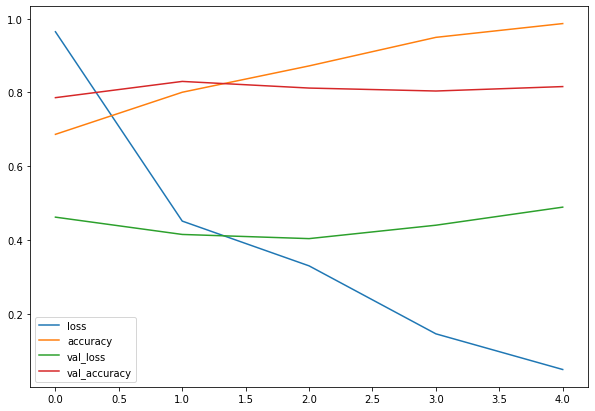

In [31]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [32]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # how many epochs did we run for?

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_acccuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

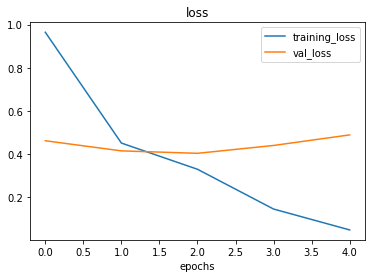

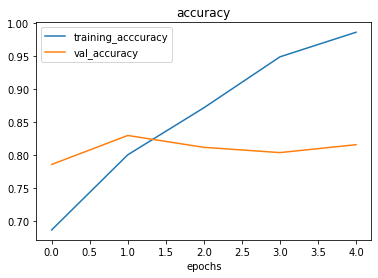

In [33]:
# Chekc out the loss and accuracy of model_4
plot_loss_curves(history_4)

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences, your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [34]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu', 
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [35]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [36]:
# Fit the model
history_5 = model_5.fit(train_data_scaled,
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=test_data_scaled,
                        validation_steps=len(test_data_scaled))

Epoch 1/5
47/47 [==============================] - 5s 84ms/step - loss: 0.6030 - accuracy: 0.6840 - val_loss: 0.5375 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 4s 82ms/step - loss: 0.4838 - accuracy: 0.7927 - val_loss: 0.4023 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 4s 82ms/step - loss: 0.4266 - accuracy: 0.8153 - val_loss: 0.3841 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 5s 101ms/step - loss: 0.4141 - accuracy: 0.8207 - val_loss: 0.3473 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 4s 84ms/step - loss: 0.3952 - accuracy: 0.8320 - val_loss: 0.3402 - val_accuracy: 0.8540


In [37]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

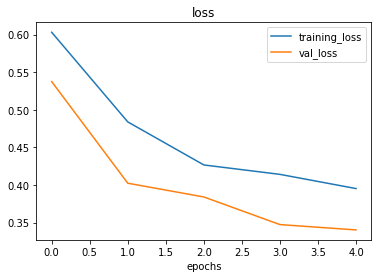

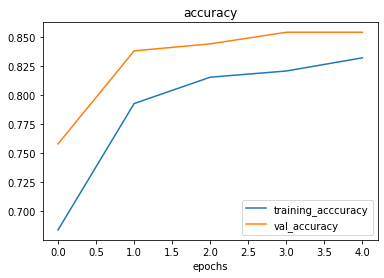

In [38]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [39]:
# Create training instance with data augmentation
tf.random.set_seed(42)

scaling_layer = tf.keras.layers.Rescaling(1./255)
augmentation_layer = Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    tf.keras.layers.RandomFlip(mode='horizontal')
])

train_data = image_dataset_from_directory(directory=train_dir, # Target directory of images
                                          label_mode='binary', # type of data you're working with
                                          batch_size=32, # size of minibatches to load data into
                                          image_size=(224, 224), # Target size of images (height, width)
                                          seed=42,
                                          shuffle=False) # only for this demo purpose
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
train_data_scaled_augmented = train_data.map(lambda x, y: (augmentation_layer(x), y))
test_data = image_dataset_from_directory(directory=test_dir,
                                          label_mode='binary',
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
test_data_scaled = test_data.map(lambda x, y: (scaling_layer(x), y))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


> 🤔 **Question:** What is data augmentation

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [40]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_scaled_augmented
print("Non-augmented traininng data:")
train_data_scaled

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data_scaled

Augmented training data:
Non-augmented traininng data:
Non-augmented test data:


<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [41]:
# Get sample data batches
scaled_iterator = iter(train_data_scaled)
images, labels = scaled_iterator.get_next()
augmented_iterator = iter(train_data_scaled_augmented)
augmented_images, augmented_labels = augmented_iterator.get_next()

Showing image number: 7


(-0.5, 223.5, 223.5, -0.5)

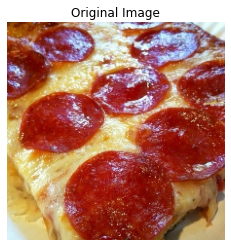

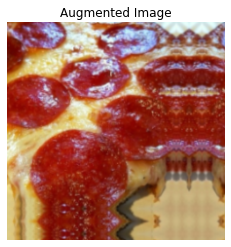

In [42]:
# Show original image and augmented image
import random

random_number = random.randint(0, 10)

print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.axis(False)

Now we've seen what augmented data looks like, let's build a model and see how it learns on augmented data.

In [43]:
# Create  a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_scaled_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled_augmented),
                        validation_data=test_data_scaled,
                        validation_steps=len(test_data_scaled))

Epoch 1/5
47/47 [==============================] - 25s 518ms/step - loss: 2.3235 - accuracy: 0.6880 - val_loss: 0.8606 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 515ms/step - loss: 0.8032 - accuracy: 0.3187 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6947 - accuracy: 0.3207 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6946 - accuracy: 0.3047 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 24s 513ms/step - loss: 0.6946 - accuracy: 0.3080 - val_loss: 0.6931 - val_accuracy: 0.5000


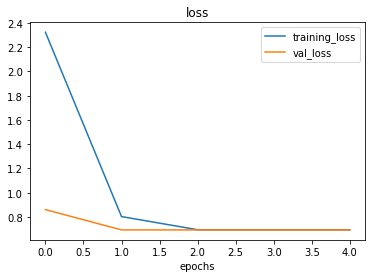

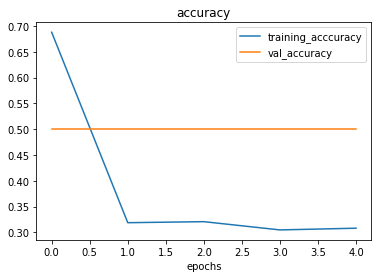

In [44]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our training data and augmented training data and train another model (the same as before) on it and see what happens.

In [45]:
# Import data and augment it and shuffle from training directory
scale = tf.keras.layers.Rescaling(1./255)
augment_scale = Sequential([
    tf.keras.layers.Rescaling(1./255,),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    tf.keras.layers.RandomFlip(mode='horizontal')
])

train_data = image_dataset_from_directory(train_dir,
                                          label_mode='binary',
                                          image_size=(224, 224),
                                          batch_size=32,
                                          shuffle=True)
train_data_augmented = train_data.map(lambda x, y: (augment_scale(x), y))
test_data = image_dataset_from_directory(test_dir,
                                         label_mode='binary',
                                         image_size=(224, 224),
                                         batch_size=32,
                                         shuffle=True)
test_data_scaled = test_data.map(lambda x, y: (scale(x), y))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [46]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data_scaled,
                      validation_steps=len(test_data_scaled))

Epoch 1/5
47/47 [==============================] - 25s 508ms/step - loss: 0.6590 - accuracy: 0.5960 - val_loss: 0.5434 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 24s 511ms/step - loss: 0.5093 - accuracy: 0.7633 - val_loss: 0.4416 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5009 - accuracy: 0.7693 - val_loss: 0.4005 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 24s 505ms/step - loss: 0.4659 - accuracy: 0.7840 - val_loss: 0.3712 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 25s 514ms/step - loss: 0.4647 - accuracy: 0.7780 - val_loss: 0.3720 - val_accuracy: 0.8420


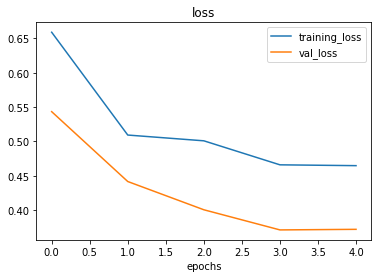

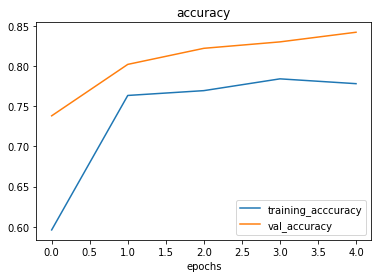

In [47]:
# Plot the loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🧰 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

### Making a prediction with our trained model on our own custom data

In [48]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-06-09 07:23:10--  https://iamafoodblog.b-cdn.net/wp-content/uploads/2021/02/how-to-cook-steak-1061w.jpg
Resolving iamafoodblog.b-cdn.net (iamafoodblog.b-cdn.net)... 212.102.46.113
Connecting to iamafoodblog.b-cdn.net (iamafoodblog.b-cdn.net)|212.102.46.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405714 (396K) [image/jpeg]
Saving to: ‘how-to-cook-steak-1061w.jpg’

how-to-cook-steak-1 100%[===================>] 396.21K  --.-KB/s    in 0.03s   

2022-06-09 07:23:10 (12.9 MB/s) - ‘how-to-cook-steak-1061w.jpg’ saved [405714/405714]



(-0.5, 2499.5, 1667.5, -0.5)

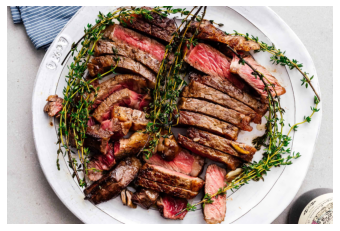

In [49]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://iamafoodblog.b-cdn.net/wp-content/uploads/2021/02/how-to-cook-steak-1061w.jpg
steak = mpimg.imread('how-to-cook-steak-1061w.jpg')
plt.imshow(steak)
plt.axis(False)

In [50]:
# Check the shape of our image
steak.shape

(1668, 2500, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important then for your custom data (or new data) to be preprocessed into the same format as the data your model was trained on.

In [51]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
    """

    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.

    return img

In [52]:
# Load in and preprocess our custom image
steak = load_and_prep_image('how-to-cook-steak-1061w.jpg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.45784345, 0.44215718, 0.44607875],
        [0.3745051 , 0.37058353, 0.35930997],
        [0.54955965, 0.59952307, 0.6762387 ],
        ...,
        [0.89880896, 0.89880896, 0.89880896],
        [0.89411765, 0.89411765, 0.89411765],
        [0.89411765, 0.89411765, 0.89411765]],

       [[0.4889356 , 0.47324932, 0.47717088],
        [0.4292773 , 0.41950557, 0.4429706 ],
        [0.37165502, 0.41325164, 0.53640527],
        ...,
        [0.90427524, 0.90427524, 0.90427524],
        [0.874261  , 0.874261  , 0.874261  ],
        [0.8941532 , 0.8941532 , 0.8941532 ]],

       [[0.53196776, 0.5162815 , 0.52020305],
        [0.44090104, 0.40560693, 0.4095285 ],
        [0.2994581 , 0.36962613, 0.46521434],
        ...,
        [0.90850025, 0.90850025, 0.90850025],
        [0.87748545, 0.87748545, 0.87748545],
        [0.9019608 , 0.9019608 , 0.9019608 ]],

       ...,

       [[0.85490197, 0.85490197, 0.85490197],
        [0.87

In [53]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.99311066]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [54]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [55]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class_names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [93]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Import an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

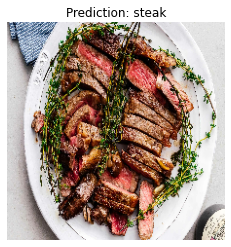

In [57]:
# Test our model on a custom image
pred_and_plot(model_7, 'how-to-cook-steak-1061w.jpg')

Our model works! Let's try it on another image... this time pizza 🍕

--2022-06-09 07:23:12--  https://www.recipetineats.com/wp-content/uploads/2020/05/Pepperoni-Pizza_5-SQjpg.jpg
Resolving www.recipetineats.com (www.recipetineats.com)... 192.0.66.112
Connecting to www.recipetineats.com (www.recipetineats.com)|192.0.66.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77670 (76K) [image/jpeg]
Saving to: ‘Pepperoni-Pizza_5-SQjpg.jpg’

Pepperoni-Pizza_5-S 100%[===================>]  75.85K  --.-KB/s    in 0.05s   

2022-06-09 07:23:12 (1.44 MB/s) - ‘Pepperoni-Pizza_5-SQjpg.jpg’ saved [77670/77670]



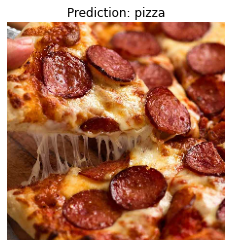

In [58]:
# Download another test custom image and make a prediction on it
!wget https://www.recipetineats.com/wp-content/uploads/2020/05/Pepperoni-Pizza_5-SQjpg.jpg
pred_and_plot(model_7, 'Pepperoni-Pizza_5-SQjpg.jpg')

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [59]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-06-09 07:23:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   233MB/s    in 2.1s    

2022-06-09 07:23:14 (233 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [60]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [61]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [62]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['238843.jpg']
Image shape: (384, 512, 3)


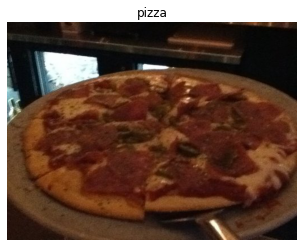

In [63]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling, RandomTranslation, RandomZoom, RandomFlip, RandomRotation

# Rescale
rescale = Rescaling(1./255)
# Augment and rescale
anr = Sequential([
    Rescaling(1./255),
    RandomTranslation(height_factor=0.2, width_factor=0.2),
    RandomZoom(0.2),
    RandomFlip(mode='horizontal'),
    RandomRotation(0.2)
])

train_data = image_dataset_from_directory(directory=train_dir,
                                          image_size=(224, 224),
                                          batch_size=32,
                                          seed=42,
                                          label_mode='categorical')
train_data = train_data.map(lambda x, y: (rescale(x), y))
test_data = image_dataset_from_directory(directory=test_dir,
                                         image_size=(224, 224),
                                         batch_size=32,
                                         seed=42,
                                         label_mode='categorical')
test_data = test_data.map(lambda x, y: (rescale(x), y))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [65]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Create the model based on CNN Explainer Tiny-VGG
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit a model

In [66]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 22s 90ms/step - loss: 2.2624 - accuracy: 0.1427 - val_loss: 2.1302 - val_accuracy: 0.2140
Epoch 2/5
235/235 [==============================] - 21s 87ms/step - loss: 1.9648 - accuracy: 0.3192 - val_loss: 2.0893 - val_accuracy: 0.2580
Epoch 3/5
235/235 [==============================] - 21s 87ms/step - loss: 1.4663 - accuracy: 0.5024 - val_loss: 2.4391 - val_accuracy: 0.2652
Epoch 4/5
235/235 [==============================] - 21s 88ms/step - loss: 0.7688 - accuracy: 0.7504 - val_loss: 4.0450 - val_accuracy: 0.2316
Epoch 5/5
235/235 [==============================] - 22s 92ms/step - loss: 0.2851 - accuracy: 0.9105 - val_loss: 5.7871 - val_accuracy: 0.2252


### 5. Evaluate the model

In [67]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 5s 56ms/step - loss: 5.7871 - accuracy: 0.2252


[5.787075519561768, 0.22519999742507935]

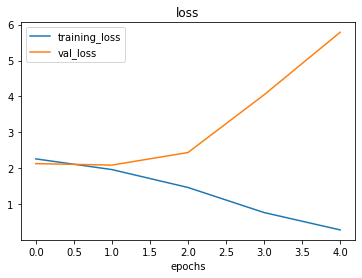

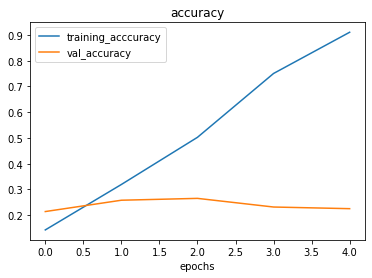

In [68]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [69]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...

model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [71]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 23s 93ms/step - loss: 2.0834 - accuracy: 0.2535 - val_loss: 1.9434 - val_accuracy: 0.3252
Epoch 2/5
235/235 [==============================] - 21s 87ms/step - loss: 1.6910 - accuracy: 0.4307 - val_loss: 1.9335 - val_accuracy: 0.3344
Epoch 3/5
235/235 [==============================] - 27s 112ms/step - loss: 1.2377 - accuracy: 0.6020 - val_loss: 2.0534 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 20s 83ms/step - loss: 0.7544 - accuracy: 0.7720 - val_loss: 2.4885 - val_accuracy: 0.2884
Epoch 5/5
235/235 [==============================] - 20s 83ms/step - loss: 0.3768 - accuracy: 0.8996 - val_loss: 2.9221 - val_accuracy: 0.2832


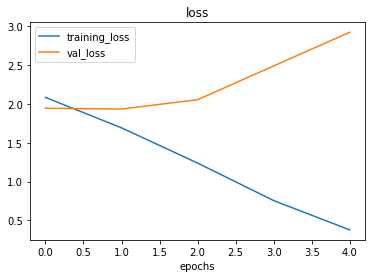

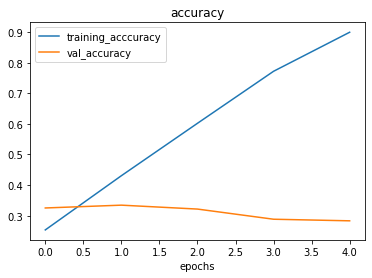

In [73]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [74]:
model_9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)              

In [75]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

Looks like our "simplifying the model" experiment didn't work.. the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation
Let's try and improve our model's results by using augmented training data...
Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer to each other)
* Improve validation accuracy

In [76]:
# Create an augmented data
augmentation = Sequential([
    RandomTranslation(height_factor=0.2, width_factor=0.2),
    RandomZoom(0.2),
    RandomFlip(mode='horizontal'),
    RandomRotation(0.2)
])

train_data_anr = train_data.map(lambda x, y: (augmentation(x), y))

In [77]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the clone model (using the same setup as previous models)
model_10.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [80]:
# Fit the model
history_10 = model_10.fit(train_data_anr,
                          epochs=5,
                          steps_per_epoch=len(train_data_anr),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 128s 537ms/step - loss: 2.2135 - accuracy: 0.1760 - val_loss: 2.1292 - val_accuracy: 0.2188
Epoch 2/5
235/235 [==============================] - 125s 528ms/step - loss: 2.1138 - accuracy: 0.2325 - val_loss: 2.0034 - val_accuracy: 0.2996
Epoch 3/5
235/235 [==============================] - 124s 526ms/step - loss: 2.0457 - accuracy: 0.2731 - val_loss: 1.9446 - val_accuracy: 0.3184
Epoch 4/5
235/235 [==============================] - 125s 531ms/step - loss: 2.0022 - accuracy: 0.2905 - val_loss: 1.9096 - val_accuracy: 0.3396
Epoch 5/5
235/235 [==============================] - 142s 604ms/step - loss: 1.9916 - accuracy: 0.2884 - val_loss: 1.8740 - val_accuracy: 0.3544


In [81]:
model_8.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 5.7871 - accuracy: 0.2252


[5.787074565887451, 0.22519999742507935]

In [82]:
model_10.evaluate(test_data)

79/79 [==============================] - 6s 61ms/step - loss: 2.9221 - accuracy: 0.2832


[2.92205810546875, 0.2831999957561493]

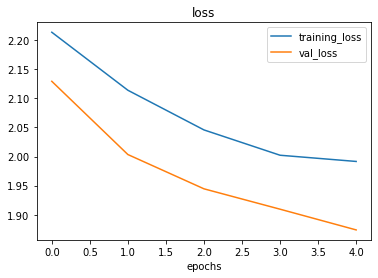

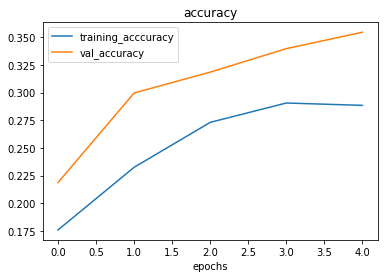

In [83]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

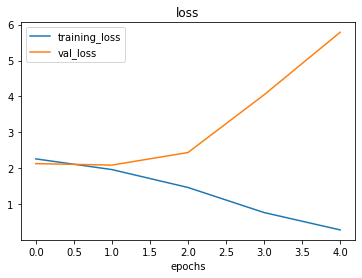

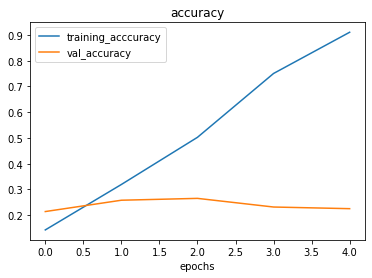

In [84]:
plot_loss_curves(history_8)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden unit)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our augmentation layer)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [86]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [87]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-06-09 08:25:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-06-09 08:25:37 (60.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-06-09 08:25:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting

In [92]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [104]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
    """
    Import an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

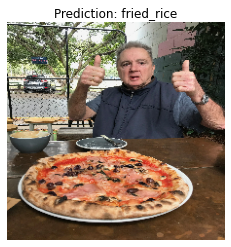

In [105]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

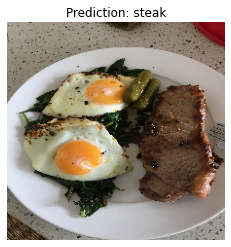

In [107]:
pred_and_plot(model=model_10,
              filename='03-steak.jpeg',
              class_names=class_names)

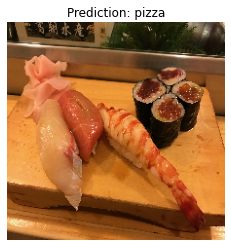

In [108]:
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

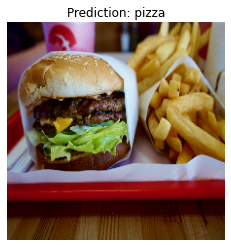

In [109]:
pred_and_plot(model=model_10,
              filename='03-hamburger.jpeg',
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~35% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [110]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [111]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 7s 75ms/step - loss: 1.8740 - accuracy: 0.3544


[1.8739984035491943, 0.35440000891685486]

In [112]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 8s 97ms/step - loss: 1.8740 - accuracy: 0.3544


[1.8739988803863525, 0.35440000891685486]

In [ ]:
model_11 = tf.keras.models.clone_model(model_8)

model_11.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_11 = model_11.fit(train_data_anr,
                          epochs=10,
                          steps_per_epoch=len(train_data_anr),
                          validation_data=test_data,
                          validation_steps=len(test_data))